<a href="https://colab.research.google.com/github/Amin-shamsaddini/T_ML_Alg/blob/main/04_02_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 17GSWgLhmYvmJ2mn0JLcuAp7bwA6gFinZ

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17GSWgLhmYvmJ2mn0JLcuAp7bwA6gFinZ
To: /content/Session04.Workshop1.Salary_Data.csv
100% 454/454 [00:00<00:00, 1.48MB/s]


In [ ]:
#Step 1 Load Data
import pandas as pd
dataset=pd.read_csv('/content/Session04.Workshop1.Salary_Data.csv')

X= dataset.iloc[: , :-1].values
y= dataset.iloc[: , 1].values


In [ ]:
dataset.shape

(30, 2)

In [ ]:
dataset.head()
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
#step 2 : split data into train and test data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.33 , random_state=42)

In [ ]:
#step3 : Fit Simple Linear Regression to Training Data
from sklearn.linear_model import SGDRegressor
sgdreg= SGDRegressor()
sgdreg.fit(X_train,y_train)

SGDRegressor()

In [ ]:
y_hat=sgdreg.predict(X_test)

In [ ]:
#step4 Validation
from sklearn.metrics import r2_score

r2_score(y_test , y_hat)




0.9508418549618587

In [ ]:
#Train daten validation
y_train_hat = sgdreg.predict(X_train)
r2_score(y_train_hat, y_train)

0.9541815392797245

In [ ]:
w0_sgd = sgdreg.intercept_
w1_sgd = sgdreg.coef_
print("Estimated coefficients by SGD:\nw_0 = {}  \
      \nw_1 = {}".format(w0_sgd, w1_sgd))


Estimated coefficients by SGD:
w_0 = [22258.35434414]        
w_1 = [9894.19150483]


In [ ]:
# from locale import normalize
# Step 3: Fit Simple Linear Regression to Training Data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training phase

LinearRegression()

In [ ]:
# Step 4: Make Prediction
y_pred = regressor.predict(X_test) #test phase
r2_score(y_test, y_pred)

0.9553063138044949

In [ ]:
w0_LR = regressor.intercept_
w1_LR = regressor.coef_
print("Estimated coefficients by Linear Regression:\nw_0 = {}  \
      \nw_1 = {}".format(w0_LR, w1_LR))

Estimated coefficients by Linear Regression:
w_0 = 25324.33537924433        
w_1 = [9426.03876907]


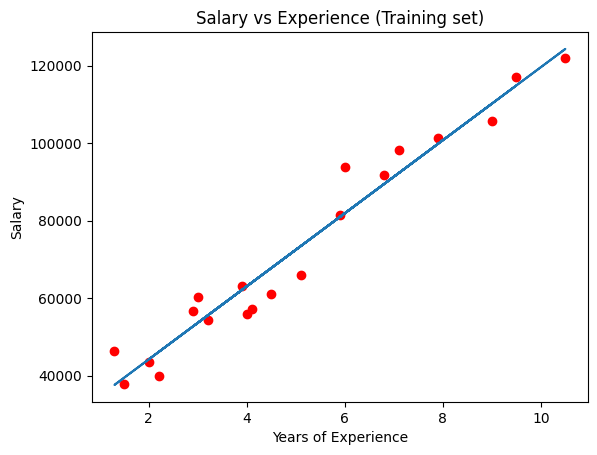

In [ ]:
#step5 Visualition traning set result
import matplotlib.pyplot as plt

# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line (trick)
plt.plot(X_train , regressor.predict(X_train))

plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.show()



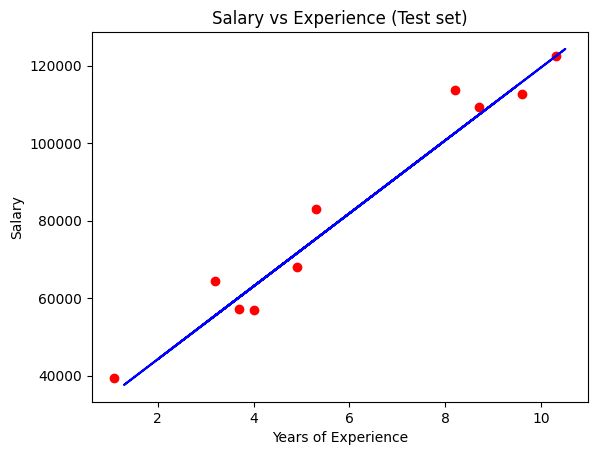

In [ ]:
# Step 6 - Visualize test set results
import matplotlib.pyplot as plt
# plot the actual data points of test set
plt.scatter(X_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
#step 7 : Make new pridiction

new_salary_perdict = regressor.predict([[15]])
print('The predicted salary of a person with 15 years experience is ',new_salary_perdict)

The predicted salary of a person with 15 years experience is  [166714.91691537]


In [ ]:
regressor.score(X_train, y_train, sample_weight=None)

0.9549236946181227

##Normal Equation in Action

In [ ]:
import numpy as np

In [ ]:
#find Weight Function
def find_weight(X , y):
  m=X.shape[0] #number of trainig exampe
  X = np.append(X , np.ones((m,1)) , axis=1) #Appending a colume of One in to X for Bias
  y= y.reshape(m,1) # To sure that y is colume shape
  weight = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))    # The Normal Equation

  return weight


In [ ]:
#Predict Function
def predict(X):
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    # preds is y_hat which is the dot product of X and weight.
    preds = np.dot(X, W_NE)
    return preds

In [ ]:
#Plotting Predictions
# Getting the Value of weight using the find_weight function.
w_NE = find_weight(X_train , y_train)
print("Estimated coefficients by Normal Equation:\nw_0 = {}  \
      \nw_1 = {}".format(w_NE[1], w_NE[0]))

Estimated coefficients by Normal Equation:
w_0 = [25324.33537924]        
w_1 = [9426.03876907]
